#  <font  color='BLUE'>___YUNUS KOLOĞLU - HOMEWORK 1___</font>

##  <font  color='red'>___PREPROCESSING___</font>


First, we need to import required libraries. 

    - OS library is required for locating the folder of documents in our projects.
    
    - Numpy library is required for executing matrix operations and other dataframe adjustments
    
    - Pandas library is required for data manipulation
    
    - Datetime will be used for converting epoch time to proper dates. Not required, but it seems better.
    
    - Matplotlib is used for plotting data.
    
    - Scipy for several matrix operations
    
    - Statsmodels for the some statistical models and random variable generations 
    
    - Statistics for some calculations
    
    - Fitter for task 1, where the package fits data to 80 different distributions.
    
    - Warnings for preventing some warning and update messages; in order to get a cleaner Kernel
    

In [59]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import warnings
import scipy
import statistics 
from scipy.stats import poisson
from fitter import Fitter
warnings.filterwarnings("ignore")


Secondly, we must locate our folder and documents. By changing the location written in the "os" command, folder can be changed. After we locate our folder, we must read our csv files.

In [64]:
os.chdir('/Users/yunusutaro/Documents/GitHub/Homework-1')
bets = pd.read_csv("bets.csv") 
booking = pd.read_csv("booking.csv") 
goals = pd.read_csv("goals.csv") 
matches = pd.read_csv("matches.csv") 
stats = pd.read_csv("stats.csv") 


Additionally, we are converting our match id's and epoch times in order to represent data better. We will also show several covers to see the results of our data conversion

In [3]:
matches = matches.replace(to_replace =195, value = "Bundesliga")
matches = matches.replace(to_replace =149, value = "E. Championship League")
matches = matches.replace(to_replace =176, value = "Ligue 1")
matches = matches.replace(to_replace =468, value = "La Liga")
matches = matches.replace(to_replace =148, value = "Premier League")
matches = matches.replace(to_replace =262, value = "Serie A")
matches = matches.replace(to_replace =511, value = "Super Lig")
matches = matches.replace(to_replace =512, value = "TFF 1. Lig")
matches['epoch'] = pd.to_datetime(matches['epoch'],unit='s')
matches[ ['epoch', 'match_hometeam_name', 'match_awayteam_name', 'league_id']]

,epoch,match_hometeam_name,match_awayteam_name,league_id
0,2018-10-19 18:30:00,Eintracht Frankfurt,Dusseldorf,Bundesliga
1,2018-10-19 18:45:00,Sheffield Wed,Middlesbrough,E. Championship League
2,2018-10-19 18:45:00,Lyon,Nimes,Ligue 1
3,2018-10-19 19:00:00,Celta Vigo,Alaves,La Liga
4,2018-10-20 11:00:00,Blackburn,Leeds,E. Championship League
5,2018-10-20 11:00:00,Real Madrid,Levante,La Liga
6,2018-10-20 11:30:00,Chelsea,Manchester United,Premier League
7,2018-10-20 13:00:00,AS Roma,Spal,Serie A
8,2018-10-20 13:00:00,Basaksehir,Kayserispor,Super Lig
9,2018-10-20 13:30:00,Wolfsburg,Bayern Munich,Bundesliga


##  <font  color='red'>___Task 1.1___</font>


Moving on with the first question of the Homework, we first determine the difference between Home and Away goals. Then, we determine our domain as the Premier League matches. Additionally, we define a new variable, which is called "Result". It is determined as the outcomes of matches. 1 refers to Home win, 2 refers to Away win and 0 refers to tie.

In [4]:
Home_Goals = matches.iloc[:, 8]
Away_Goals = matches.iloc[:, 9]
Difference_Goals = Home_Goals - Away_Goals
matches.insert(3, "Result", Difference_Goals)

matches.loc[matches['Result'] > 0, 'Result'] = 1
matches.loc[matches['Result'] == 0, 'Result'] = 0
matches.loc[matches['Result'] < 0, 'Result'] = 2


Premier_League = matches[matches.league_id == "Premier League"]
Pre_Home_Goals = Premier_League.iloc[: , 9]
Pre_Away_Goals = Premier_League.iloc[: , 10]

Pre_Difference_Goals = Pre_Home_Goals - Pre_Away_Goals

After the preparation is done, we do the plotting operations. First, we plot Home Scores. Maximum number of home goals in a match is 8 in our case, thus number of bars will be 8.

(array([ 65., 105.,  84.,  42.,  16.,   8.,   3.,   1.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Patch objects>)

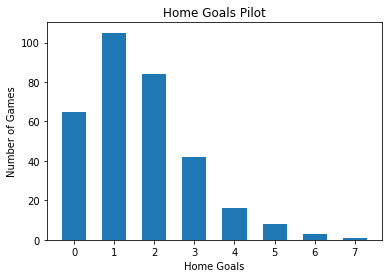

In [5]:
plt.title('Home Goals Pilot')
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')
plt.hist(Pre_Home_Goals, 8, rwidth = 0.6, align = "left")

Then, we plot away goals. Maximum number of away goals in a match is 6, thus number of bars will be 6.

(array([101., 109.,  65.,  35.,   8.,   6.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

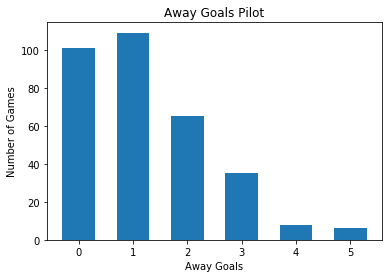

In [6]:
plt.title('Away Goals Pilot')
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')
plt.hist(Pre_Away_Goals, 6, rwidth = 0.6, align = "left")

And lastly, we plot home-away goals. 

(array([ 2.,  7.,  9., 35., 47., 70., 65., 59., 13.,  8.,  6.,  2.,  0.,
         1.]),
 array([-5.        , -4.07142857, -3.14285714, -2.21428571, -1.28571429,
        -0.35714286,  0.57142857,  1.5       ,  2.42857143,  3.35714286,
         4.28571429,  5.21428571,  6.14285714,  7.07142857,  8.        ]),
 <a list of 14 Patch objects>)

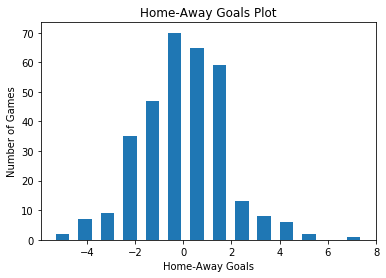

In [7]:

plt.title('Home-Away Goals Plot')
plt.xlabel('Home-Away Goals')
plt.ylabel('Number of Games')
plt.hist(Pre_Difference_Goals, 14, rwidth = 0.6, align = "left")

##  <font  color='red'>___Task 1.2___</font>

Second part of the question asks us about the best fitting distribution to the Home Goals and Away Goals. In order to find the best fitting, "fitter" package will be used. This package tries 80 different distributions on the data, displays the squared sum errors for distributions and ranks the best fitting 5 distributions. Detailed explanation can be found in the link https://pythonhosted.org/fitter/. However, fitter package doesn't use Poisson distribution.

Fitted alpha distribution with error=33.35407201814803)
Fitted anglit distribution with error=33.948390278982)
Fitted arcsine distribution with error=33.110044489334754)
Fitted argus distribution with error=34.99189552819972)
Fitted beta distribution with error=31.710778175058955)
Fitted betaprime distribution with error=31.415472854706408)
Fitted bradford distribution with error=31.820714144718472)
Fitted burr distribution with error=32.08284256990726)
Fitted burr12 distribution with error=30.523694792940926)
Fitted cauchy distribution with error=33.68251612858743)
Fitted chi distribution with error=31.268368450678967)
Fitted chi2 distribution with error=32.57430875048501)
Fitted cosine distribution with error=33.68916631547359)
Fitted crystalball distribution with error=33.446055106186265)
Fitted dgamma distribution with error=32.669373342846676)
Fitted dweibull distribution with error=32.94945393667096)
Fitted erlang distribution with error=30.561181872013375)
Fitted expon distribut

,sumsquare_error
gennorm,26.607782
nakagami,30.314810
burr12,30.523695
erlang,30.561182
frechet_r,30.742472


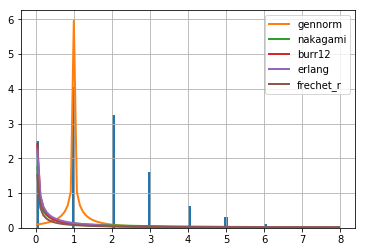

In [14]:
f = Fitter(Pre_Home_Goals)
f.fit()
f.summary()

As seen above, the best fitting functions are Generalized Normal Distribution, Nakagami, Burr XII, Erlang and Fréchet distributions for Home Goals. The question also asks us about whether the Poisson distribution seems to be fitting or not. For this purpose, we will find the sample mean and fit a Poisson distribution within these parameters.

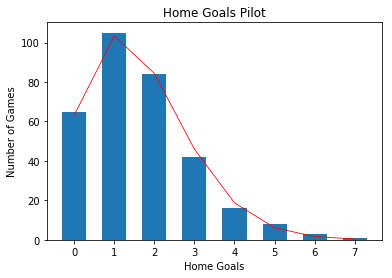

Sum of Squared Error: 34.079663489100376


In [15]:
mean_home = statistics.mean(Pre_Home_Goals)
rv = poisson(mean_home )
arr = []
for num in range(0,8):
 arr.append(rv.pmf(num)*len(Pre_Home_Goals))

plt.title('Home Goals Pilot')
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')
plt.hist(Pre_Home_Goals, 8, rwidth = 0.6, align = "left")
plt.plot(arr, linewidth=0.8, c = "r")
plt.show()

home_error = 0
for i in range(0, 8):
    home_error = home_error + pow((rv.pmf(i)*len(Pre_Home_Goals)-Pre_Home_Goals[Pre_Home_Goals== i].count()),2)
print("Sum of Squared Error:", home_error)



As seen in the plot above, when the Poisson probabilities are scaled with respect to the total number of matches, Poisson distribution fits well into the Home Goals. When sum of squares are calculated, it is found as 34.07. When we compare this value within the values that are obtained by fitter package, the value is close to the distributions that are determined as the best. Thus, we can conclude that Poisson distribution claim is consistent within the graph. In the next step, we execute the same operation for away goals.

Fitted alpha distribution with error=66.86565958760829)
Fitted anglit distribution with error=68.86459192422606)
Fitted arcsine distribution with error=65.28218003518276)
Fitted argus distribution with error=71.4234948521255)
Fitted beta distribution with error=54.523386782500545)
Fitted betaprime distribution with error=55.91805787682974)
Fitted bradford distribution with error=57.58615392751864)
Fitted burr distribution with error=53.80993679226268)
Fitted burr12 distribution with error=54.43933725927651)
Fitted cauchy distribution with error=68.76892334410124)
Fitted chi distribution with error=56.09195120210112)
Fitted chi2 distribution with error=63.96948473210229)
Fitted cosine distribution with error=69.40044039593779)
Fitted crystalball distribution with error=68.80452053297127)
Fitted dgamma distribution with error=61.751460007679256)
Fitted dweibull distribution with error=59.09054469368157)
Fitted erlang distribution with error=59.83186138629801)
Fitted expon distribution wi

,sumsquare_error
halfgennorm,52.016357
levy,52.552036
exponweib,52.853727
burr,53.809937
mielke,54.343580


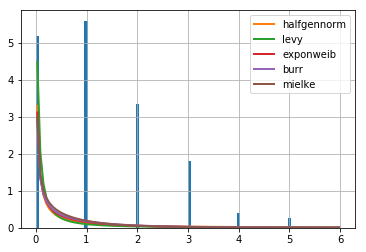

In [16]:
f = Fitter(Pre_Away_Goals)
f.fit()
f.summary()


Results indicate that Half Generalized Normal Distribution, Lévy, Exponential Weibull, Burr and Mielke distributions are the most fitting distributions for Away goals. Now, as we did in the previous part, we will try to fit Poisson distribution on away goals, within a parameter which is equal to sample mean.

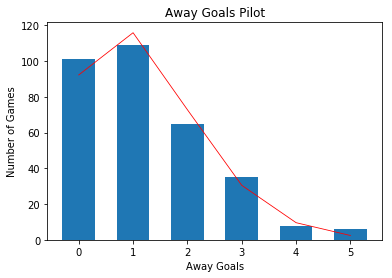

Sum of Squared Error: 214.4930549461718


In [17]:
mean_away = statistics.mean(Pre_Away_Goals)
rv = poisson(mean_away)
arr = []
for num in range(0,6):
 arr.append(rv.pmf(num)*len(Pre_Away_Goals))

plt.title('Away Goals Pilot')
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')
plt.hist(Pre_Away_Goals, 6, rwidth = 0.6, align = "left")
plt.plot(arr, linewidth=0.8, c = "r")
plt.show()

away_error = 0
for i in range(0, 8):
    away_error = away_error + pow((rv.pmf(i)*len(Pre_Away_Goals)-Pre_Away_Goals[Pre_Away_Goals== i].count()),2)
print("Sum of Squared Error:", away_error)

When we observe Away goals plot with respect to Poisson distribution, we observe that success of distribution is not as good as it is on Home goals. Although in display it seems to be fitting, sum of squared error values are not as good as the found distributions in fitter function.

#  <font  color='red'>___Task 2___</font>

In this step, it is wanted from us to establish several operations on 4 different betters. These operations include;

- Finding odd probabilities for Home Wins, Draw Wins, Ties

- Find normalized versions of these probabilities

- Construct a plot with Y axis of P(Tie) and X axis of P(Home Win) - P(Away Win)

- Include the sample probabilities on the plot

- Comment on making money from betting on draw in a long run

Betters in this homework are chosen as "Interwetten", "Jetbull", "Betsafe" and "Betvictor". First, we merge matches and bets data and eliminate the redundant features and odd values.




In [19]:
combined = bets.merge(matches, on = 'match_id', how = 'left'   )
del combined['odd_epoch']
del combined['match_awayteam_id']
del combined['match_hometeam_id']
del combined['match_live']
del combined['match_hometeam_halftime_score']
del combined['match_awayteam_halftime_score']
del combined['match_hometeam_extra_score']
del combined['match_awayteam_extra_score']
del combined['match_hometeam_penalty_score']
del combined['match_awayteam_penalty_score']
del combined['epoch']
EPL_Bets = combined[combined.league_id == "Premier League"]


EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'odd_1x'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'odd_12'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'odd_x2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-4.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-4.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-4_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-4_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-3.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-3.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-3_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-3_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-2.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-2.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-2_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-2_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-2_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-1_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-0_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-0_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah-0.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+1_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+1_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+1.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+0.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+0.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+1.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+1.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+2.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+2.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+3'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+3'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+3.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+3.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+4'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+4'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah0_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah0_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+0.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+1_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+1.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+4.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+4.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'o+5.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'u+5.5'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'bts_yes'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'bts_no'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+2_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+2_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+2.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+2.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+3_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+3_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+3.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+3.5_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+4_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+4_2'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+4.5_1'])
EPL_Bets = EPL_Bets.drop(EPL_Bets.index[EPL_Bets.variable == 'ah+4.5_2'])


EPL_Bets = EPL_Bets.drop(['match_hometeam_score', 'match_awayteam_score', 'match_hometeam_name',
               'match_awayteam_name', 'match_status'], axis = 1) 

EPL_Interwetten_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Interwetten.es"]
EPL_Jetbull_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Jetbull"]
EPL_Betsafe_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Betsafe"]
EPL_Betvictor_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "BetVictor"]

EPL_Interwetten_bets = EPL_Interwetten_bets.reset_index(drop=True)
EPL_Jetbull_bets = EPL_Jetbull_bets.reset_index(drop=True)
EPL_Betsafe_bets = EPL_Betsafe_bets.reset_index(drop=True)
EPL_Betvictor_bets = EPL_Betvictor_bets.reset_index(drop=True)




#  <font  color='red'>___Interwetten - 2___</font>

We first define different dataframes which only include Home Win, Away Win and Tie odds.

In [20]:

EPL_Interwetten_bets_HomeWin = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_1"]
EPL_Interwetten_bets_AwayWin = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_2"]
EPL_Interwetten_bets_Tie = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_x"]
EPL_Interwetten_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Interwetten_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Interwetten_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

Then, we find probabilities of these odds according to betters and merge them in a new dataframe.

In [21]:

EPL_Interwetten_bets_HomeWin["Home Value"] = 1/EPL_Interwetten_bets_HomeWin["Home Value"]
EPL_Interwetten_bets_AwayWin["Away Value"] = 1/EPL_Interwetten_bets_AwayWin["Away Value"]
EPL_Interwetten_bets_Tie["Tie Value"] = 1/EPL_Interwetten_bets_Tie["Tie Value"]


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_HomeWin.merge(
        EPL_Interwetten_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds.merge(
        EPL_Interwetten_bets_Tie, on = 'match_id', how = 'left')


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]

Next step includes finding their normalized probabilities and Home-Away probabilities.

In [22]:
better1 = EPL_Interwetten_bets_odds

better1_normHome = better1['Home Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

better1_normAway = better1['Away Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

better1_normTie = better1['Tie Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

Home_Away = better1_normHome - better1_normAway

better1.insert(7, 'Normalized Home', better1_normHome, True )
better1.insert(8, 'Normalized Away', better1_normAway, True )
better1.insert(9, 'Normalized Tie', better1_normTie, True )
better1.insert(10, 'Home - Away', Home_Away, True )

For displaying purposes, Normalized and Nominal probabilities will be shown below.

In [23]:
better1

,match_id,odd_bookmakers_x,league_id_y,Result_x,Home Value,Away Value,Tie Value,Normalized Home,Normalized Away,Normalized Tie,Home - Away
0,150842,Interwetten.es,Premier League,0,0.689655,0.142857,0.222222,0.653866,0.135444,0.210690,0.518422
1,150843,Interwetten.es,Premier League,0,0.666667,0.153846,0.232558,0.633069,0.146093,0.220838,0.486976
2,150844,Interwetten.es,Premier League,1,0.689655,0.156250,0.208333,0.654174,0.148211,0.197615,0.505963
3,154513,Interwetten.es,Premier League,0,0.327869,0.408163,0.317460,0.311221,0.387438,0.301341,-0.076217
4,154516,Interwetten.es,Premier League,0,0.714286,0.131579,0.208333,0.677563,0.124814,0.197623,0.552749
5,154517,Interwetten.es,Premier League,2,0.172414,0.636943,0.243902,0.163696,0.604735,0.231569,-0.441040
6,154518,Interwetten.es,Premier League,2,0.100000,0.787402,0.166667,0.094871,0.747012,0.158118,-0.652141
7,155388,Interwetten.es,Premier League,2,0.270270,0.500000,0.285714,0.255941,0.473492,0.270567,-0.217550
8,156200,Interwetten.es,Premier League,2,0.370370,0.370370,0.312500,0.351648,0.351648,0.296703,0.000000
9,156845,Interwetten.es,Premier League,1,0.598802,0.192308,0.263158,0.567979,0.182409,0.249612,0.385571


Now, we will find the sample probabilities with respect to determined bins. In this case, I have determined 20 bins, between -1 and 1. Increment amount in the preceeding bins is 0.1. Basically, I calculated the proportions of the games that end in draw in these bins. I assigned a variable for each of these bins, and combined them in order to achieve a new dataframe. "C1" refers to this dataframe. N/A values, which are caused by the division to 0 are replaced with 0.

In [24]:
a1 = better1[(better1["Home - Away"] >= -1) & (better1["Home - Away"] < -0.9)].count()['Result_x']
a2 = better1[(better1["Home - Away"] >= -0.9) & (better1["Home - Away"] < -0.8)].count()['Result_x']
a3 = better1[(better1["Home - Away"] >= -0.8) & (better1["Home - Away"] < -0.7)].count()['Result_x']
a4 = better1[(better1["Home - Away"] >= -0.7) & (better1["Home - Away"] < -0.6)].count()['Result_x']
a5 = better1[(better1["Home - Away"] >= -0.6) & (better1["Home - Away"] < -0.5)].count()['Result_x']
a6 = better1[(better1["Home - Away"] >= -0.5) & (better1["Home - Away"] < -0.4)].count()['Result_x']
a7 = better1[(better1["Home - Away"] >= -0.4) & (better1["Home - Away"] < -0.3)].count()['Result_x']
a8 = better1[(better1["Home - Away"] >= -0.3) & (better1["Home - Away"] < -0.2)].count()['Result_x']
a9 = better1[(better1["Home - Away"] >= -0.2) & (better1["Home - Away"] < -0.1)].count()['Result_x']
a10 = better1[(better1["Home - Away"] >= -0.1) & (better1["Home - Away"] < 0)].count()['Result_x']
a11 = better1[(better1["Home - Away"] >= 0) & (better1["Home - Away"] < 0.1)].count()['Result_x']
a12 = better1[(better1["Home - Away"] >= 0.1) & (better1["Home - Away"] < 0.2)].count()['Result_x']
a13 = better1[(better1["Home - Away"] >= 0.2) & (better1["Home - Away"] < 0.3)].count()['Result_x']
a14 = better1[(better1["Home - Away"] >= 0.3) & (better1["Home - Away"] < 0.4)].count()['Result_x']
a15 = better1[(better1["Home - Away"] >= 0.4) & (better1["Home - Away"] < 0.5)].count()['Result_x']
a16 = better1[(better1["Home - Away"] >= 0.5) & (better1["Home - Away"] < 0.6)].count()['Result_x']
a17 = better1[(better1["Home - Away"] >= 0.6) & (better1["Home - Away"] < 0.7)].count()['Result_x']
a18 = better1[(better1["Home - Away"] >= 0.7) & (better1["Home - Away"] < 0.8)].count()['Result_x']
a19 = better1[(better1["Home - Away"] >= 0.8) & (better1["Home - Away"] < 0.9)].count()['Result_x']
a20 = better1[(better1["Home - Away"] >= 0.9) & (better1["Home - Away"] < 1)].count()['Result_x']

b1 = better1[(better1["Home - Away"] >= -1) & (better1["Home - Away"] < -0.9) & (better1["Result_x"]==0)].count()['Result_x']
b2 = better1[(better1["Home - Away"] >= -0.9) & (better1["Home - Away"] < -0.8)& (better1["Result_x"]==0)].count()['Result_x']
b3 = better1[(better1["Home - Away"] >= -0.8) & (better1["Home - Away"] < -0.7)& (better1["Result_x"]==0)].count()['Result_x']
b4 = better1[(better1["Home - Away"] >= -0.7) & (better1["Home - Away"] < -0.6)& (better1["Result_x"]==0)].count()['Result_x']
b5 = better1[(better1["Home - Away"] >= -0.6) & (better1["Home - Away"] < -0.5)& (better1["Result_x"]==0)].count()['Result_x']
b6 = better1[(better1["Home - Away"] >= -0.5) & (better1["Home - Away"] < -0.4)& (better1["Result_x"]==0)].count()['Result_x']
b7 = better1[(better1["Home - Away"] >= -0.4) & (better1["Home - Away"] < -0.3)& (better1["Result_x"]==0)].count()['Result_x']
b8 = better1[(better1["Home - Away"] >= -0.3) & (better1["Home - Away"] < -0.2)& (better1["Result_x"]==0)].count()['Result_x']
b9 = better1[(better1["Home - Away"] >= -0.2) & (better1["Home - Away"] < -0.1)& (better1["Result_x"]==0)].count()['Result_x']
b10 = better1[(better1["Home - Away"] >= -0.1) & (better1["Home - Away"] < 0)& (better1["Result_x"]==0)].count()['Result_x']
b11 = better1[(better1["Home - Away"] >= 0) & (better1["Home - Away"] < 0.1)& (better1["Result_x"]==0)].count()['Result_x']
b12 = better1[(better1["Home - Away"] >= 0.1) & (better1["Home - Away"] < 0.2)& (better1["Result_x"]==0)].count()['Result_x']
b13 = better1[(better1["Home - Away"] >= 0.2) & (better1["Home - Away"] < 0.3)& (better1["Result_x"]==0)].count()['Result_x']
b14 = better1[(better1["Home - Away"] >= 0.3) & (better1["Home - Away"] < 0.4)& (better1["Result_x"]==0)].count()['Result_x']
b15 = better1[(better1["Home - Away"] >= 0.4) & (better1["Home - Away"] < 0.5)& (better1["Result_x"]==0)].count()['Result_x']
b16 = better1[(better1["Home - Away"] >= 0.5) & (better1["Home - Away"] < 0.6)& (better1["Result_x"]==0)].count()['Result_x']
b17 = better1[(better1["Home - Away"] >= 0.6) & (better1["Home - Away"] < 0.7)& (better1["Result_x"]==0)].count()['Result_x']
b18 = better1[(better1["Home - Away"] >= 0.7) & (better1["Home - Away"] < 0.8)& (better1["Result_x"]==0)].count()['Result_x']
b19 = better1[(better1["Home - Away"] >= 0.8) & (better1["Home - Away"] < 0.9)& (better1["Result_x"]==0)].count()['Result_x']
b20 = better1[(better1["Home - Away"] >= 0.9) & (better1["Home - Away"] < 1)& (better1["Result_x"]==0)].count()['Result_x']


x1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
                        a11, a12, a13, a14, a15, a16, a17, a18,
                        a19,a20], 'Number of Draws:': [b1, b2, b3,
                        b4, b5, b6, b7, b8, b9, b10, b11, b12, b13,
                        b14, b15, b16, b17, b18, b19, b20]}

better1_draws = pd.DataFrame(data=x1)
better1_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better1_draws.fillna(0, inplace = True)

Then, in order to represent better, we add a trendline of 2nd order polynomial which is fitted into theoretical odds.

In [37]:
z = np.polyfit(better1['Home - Away'], better1['Normalized Tie'], 2)
p = np.poly1d(z)

Ultimately, we plot everything we have found so far.

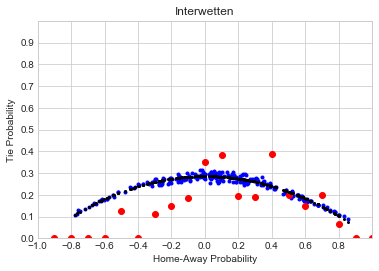

In [39]:
plt.style.use('seaborn-whitegrid')


plt.title('Interwetten')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better1['Home - Away'],  better1['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better1_draws['Probability'],  better1_draws['Draw Probability'], 'o', color='red');
plt.plot(better1['Home - Away'],p(better1['Home - Away']),"o", ms=2,  color = 'black', )

As seen on the plot above,  above, especially in the bins 0.0 - 0.1, 0.1 - 0.2, 0.4 - 0.5, 0.5 - 0.6 and 0.7 - 0.8; it is possible to win in the long run by betting on draw, as sample mean is higher than the theoretical probabilities in these bins.

#  <font  color='red'>___Jetbull - 2___</font>
Same processes will be done for Jetbull. Thus, additional explanation is not written with regards to the processes.

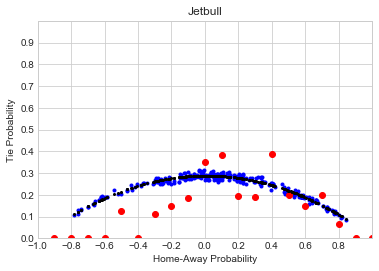

In [40]:

EPL_Jetbull_bets_HomeWin = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_1"]
EPL_Jetbull_bets_AwayWin = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_2"]
EPL_Jetbull_bets_Tie = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_x"]


EPL_Jetbull_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Jetbull_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Jetbull_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Jetbull_bets_HomeWin["Home Value"] = 1/EPL_Jetbull_bets_HomeWin["Home Value"]
EPL_Jetbull_bets_AwayWin["Away Value"] = 1/EPL_Jetbull_bets_AwayWin["Away Value"]
EPL_Jetbull_bets_Tie["Tie Value"] = 1/EPL_Jetbull_bets_Tie["Tie Value"]


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_HomeWin.merge(
        EPL_Jetbull_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds.merge(
        EPL_Jetbull_bets_Tie, on = 'match_id', how = 'left')


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better2 = EPL_Jetbull_bets_odds

better2_normHome = better2['Home Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

better2_normAway = better2['Away Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

better2_normTie = better2['Tie Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

Home_Away = better2_normHome - better2_normAway

better2.insert(7, 'Normalized Home', better2_normHome, True )
better2.insert(8, 'Normalized Away', better2_normAway, True )
better2.insert(9, 'Normalized Tie', better2_normTie, True )
better2.insert(10, 'Home - Away', Home_Away, True )

c1 = better2[(better2["Home - Away"] >= -1) & (better2["Home - Away"] < -0.9)].count()['Result_x']
c2 = better2[(better2["Home - Away"] >= -0.9) & (better2["Home - Away"] < -0.8)].count()['Result_x']
c3 = better2[(better2["Home - Away"] >= -0.8) & (better2["Home - Away"] < -0.7)].count()['Result_x']
c4 = better2[(better2["Home - Away"] >= -0.7) & (better2["Home - Away"] < -0.6)].count()['Result_x']
c5 = better2[(better2["Home - Away"] >= -0.6) & (better2["Home - Away"] < -0.5)].count()['Result_x']
c6 = better2[(better2["Home - Away"] >= -0.5) & (better2["Home - Away"] < -0.4)].count()['Result_x']
c7 = better2[(better2["Home - Away"] >= -0.4) & (better2["Home - Away"] < -0.3)].count()['Result_x']
c8 = better2[(better2["Home - Away"] >= -0.3) & (better2["Home - Away"] < -0.2)].count()['Result_x']
c9 = better2[(better2["Home - Away"] >= -0.2) & (better2["Home - Away"] < -0.1)].count()['Result_x']
c10 = better2[(better2["Home - Away"] >= -0.1) & (better2["Home - Away"] < 0)].count()['Result_x']
c11 = better2[(better2["Home - Away"] >= 0) & (better2["Home - Away"] < 0.1)].count()['Result_x']
c12 = better2[(better2["Home - Away"] >= 0.1) & (better2["Home - Away"] < 0.2)].count()['Result_x']
c13 = better2[(better2["Home - Away"] >= 0.2) & (better2["Home - Away"] < 0.3)].count()['Result_x']
c14 = better2[(better2["Home - Away"] >= 0.3) & (better2["Home - Away"] < 0.4)].count()['Result_x']
c15 = better2[(better2["Home - Away"] >= 0.4) & (better2["Home - Away"] < 0.5)].count()['Result_x']
c16 = better2[(better2["Home - Away"] >= 0.5) & (better2["Home - Away"] < 0.6)].count()['Result_x']
c17 = better2[(better2["Home - Away"] >= 0.6) & (better2["Home - Away"] < 0.7)].count()['Result_x']
c18 = better2[(better2["Home - Away"] >= 0.7) & (better2["Home - Away"] < 0.8)].count()['Result_x']
c19 = better2[(better2["Home - Away"] >= 0.8) & (better2["Home - Away"] < 0.9)].count()['Result_x']
c20 = better2[(better2["Home - Away"] >= 0.9) & (better2["Home - Away"] < 1)].count()['Result_x']

d1 = better2[(better2["Home - Away"] >= -1) & (better2["Home - Away"] < -0.9) & (better2["Result_x"]==0)].count()['Result_x']
d2 = better2[(better2["Home - Away"] >= -0.9) & (better2["Home - Away"] < -0.8)& (better2["Result_x"]==0)].count()['Result_x']
d3 = better2[(better2["Home - Away"] >= -0.8) & (better2["Home - Away"] < -0.7)& (better2["Result_x"]==0)].count()['Result_x']
d4 = better2[(better2["Home - Away"] >= -0.7) & (better2["Home - Away"] < -0.6)& (better2["Result_x"]==0)].count()['Result_x']
d5 = better2[(better2["Home - Away"] >= -0.6) & (better2["Home - Away"] < -0.5)& (better2["Result_x"]==0)].count()['Result_x']
d6 = better2[(better2["Home - Away"] >= -0.5) & (better2["Home - Away"] < -0.4)& (better2["Result_x"]==0)].count()['Result_x']
d7 = better2[(better2["Home - Away"] >= -0.4) & (better2["Home - Away"] < -0.3)& (better2["Result_x"]==0)].count()['Result_x']
d8 = better2[(better2["Home - Away"] >= -0.3) & (better2["Home - Away"] < -0.2)& (better2["Result_x"]==0)].count()['Result_x']
d9 = better2[(better2["Home - Away"] >= -0.2) & (better2["Home - Away"] < -0.1)& (better2["Result_x"]==0)].count()['Result_x']
d10 = better2[(better2["Home - Away"] >= -0.1) & (better2["Home - Away"] < 0)& (better2["Result_x"]==0)].count()['Result_x']
d11 = better2[(better2["Home - Away"] >= 0) & (better2["Home - Away"] < 0.1)& (better2["Result_x"]==0)].count()['Result_x']
d12 = better2[(better2["Home - Away"] >= 0.1) & (better2["Home - Away"] < 0.2)& (better2["Result_x"]==0)].count()['Result_x']
d13 = better2[(better2["Home - Away"] >= 0.2) & (better2["Home - Away"] < 0.3)& (better2["Result_x"]==0)].count()['Result_x']
d14 = better2[(better2["Home - Away"] >= 0.3) & (better2["Home - Away"] < 0.4)& (better2["Result_x"]==0)].count()['Result_x']
d15 = better2[(better2["Home - Away"] >= 0.4) & (better2["Home - Away"] < 0.5)& (better2["Result_x"]==0)].count()['Result_x']
d16 = better2[(better2["Home - Away"] >= 0.5) & (better2["Home - Away"] < 0.6)& (better2["Result_x"]==0)].count()['Result_x']
d17 = better2[(better2["Home - Away"] >= 0.6) & (better2["Home - Away"] < 0.7)& (better2["Result_x"]==0)].count()['Result_x']
d18 = better2[(better2["Home - Away"] >= 0.7) & (better2["Home - Away"] < 0.8)& (better2["Result_x"]==0)].count()['Result_x']
d19 = better2[(better2["Home - Away"] >= 0.8) & (better2["Home - Away"] < 0.9)& (better2["Result_x"]==0)].count()['Result_x']
d20 = better2[(better2["Home - Away"] >= 0.9) & (better2["Home - Away"] < 1)& (better2["Result_x"]==0)].count()['Result_x']


y1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
                        c11, c12, c13, c14, c15, c16, c17, c18,
                        c19,c20], 'Number of Draws:': [d1, d2, d3,
                        d4, d5, d6, d7, d8, d9, d10, d11, d12, d13,
                        d14, d15, d16, d17, d18, d19, d20]}

better2_draws = pd.DataFrame(data=y1)
better2_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better2_draws.fillna(0, inplace = True)



z = np.polyfit(better2['Home - Away'], better2['Normalized Tie'], 2)
p = np.poly1d(z)
plt.title('Jetbull')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.style.use('seaborn-whitegrid')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better2['Home - Away'],  better2['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better2_draws['Probability'],  better2_draws['Draw Probability'], 'o', color='red');
plt.plot(better2['Home - Away'],p(better2['Home - Away']),"o", ms=2,  color = 'black', )


Same comments can also be done in th Jetbull case, as patterns that are shown in the graph are nearly same. In the bins 0.0 - 0.1, 0.1 - 0.2, 0.4 - 0.5 and 0.7 - 0.8; it is possible to win in the long run by betting on draw, as sample mean is higher than the theoretical probabilities in these bins.

#  <font  color='red'>___Betsafe - 2___</font>
Same processes will be done for Betsafe. Thus, additional explanation is not written with regards to the processes.

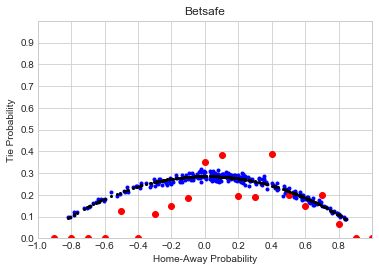

In [41]:

EPL_Betsafe_bets_HomeWin = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_1"]
EPL_Betsafe_bets_AwayWin = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_2"]
EPL_Betsafe_bets_Tie = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_x"]


EPL_Betsafe_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Betsafe_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Betsafe_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Betsafe_bets_HomeWin["Home Value"] = 1/EPL_Betsafe_bets_HomeWin["Home Value"]
EPL_Betsafe_bets_AwayWin["Away Value"] = 1/EPL_Betsafe_bets_AwayWin["Away Value"]
EPL_Betsafe_bets_Tie["Tie Value"] = 1/EPL_Betsafe_bets_Tie["Tie Value"]


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_HomeWin.merge(
        EPL_Betsafe_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds.merge(
        EPL_Betsafe_bets_Tie, on = 'match_id', how = 'left')


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better3 = EPL_Betsafe_bets_odds

better3_normHome = better3['Home Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

better3_normAway = better3['Away Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

better3_normTie = better3['Tie Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

Home_Away = better3_normHome - better3_normAway

better3.insert(7, 'Normalized Home', better3_normHome, True )
better3.insert(8, 'Normalized Away', better3_normAway, True )
better3.insert(9, 'Normalized Tie', better3_normTie, True )
better3.insert(10, 'Home - Away', Home_Away, True )

e1 = better3[(better3["Home - Away"] >= -1) & (better3["Home - Away"] < -0.9)].count()['Result_x']
e2 = better3[(better3["Home - Away"] >= -0.9) & (better3["Home - Away"] < -0.8)].count()['Result_x']
e3 = better3[(better3["Home - Away"] >= -0.8) & (better3["Home - Away"] < -0.7)].count()['Result_x']
e4 = better3[(better3["Home - Away"] >= -0.7) & (better3["Home - Away"] < -0.6)].count()['Result_x']
e5 = better3[(better3["Home - Away"] >= -0.6) & (better3["Home - Away"] < -0.5)].count()['Result_x']
e6 = better3[(better3["Home - Away"] >= -0.5) & (better3["Home - Away"] < -0.4)].count()['Result_x']
e7 = better3[(better3["Home - Away"] >= -0.4) & (better3["Home - Away"] < -0.3)].count()['Result_x']
e8 = better3[(better3["Home - Away"] >= -0.3) & (better3["Home - Away"] < -0.2)].count()['Result_x']
e9 = better3[(better3["Home - Away"] >= -0.2) & (better3["Home - Away"] < -0.1)].count()['Result_x']
e10 = better3[(better3["Home - Away"] >= -0.1) & (better3["Home - Away"] < 0)].count()['Result_x']
e11 = better3[(better3["Home - Away"] >= 0) & (better3["Home - Away"] < 0.1)].count()['Result_x']
e12 = better3[(better3["Home - Away"] >= 0.1) & (better3["Home - Away"] < 0.2)].count()['Result_x']
e13 = better3[(better3["Home - Away"] >= 0.2) & (better3["Home - Away"] < 0.3)].count()['Result_x']
e14 = better3[(better3["Home - Away"] >= 0.3) & (better3["Home - Away"] < 0.4)].count()['Result_x']
e15 = better3[(better3["Home - Away"] >= 0.4) & (better3["Home - Away"] < 0.5)].count()['Result_x']
e16 = better3[(better3["Home - Away"] >= 0.5) & (better3["Home - Away"] < 0.6)].count()['Result_x']
e17 = better3[(better3["Home - Away"] >= 0.6) & (better3["Home - Away"] < 0.7)].count()['Result_x']
e18 = better3[(better3["Home - Away"] >= 0.7) & (better3["Home - Away"] < 0.8)].count()['Result_x']
e19 = better3[(better3["Home - Away"] >= 0.8) & (better3["Home - Away"] < 0.9)].count()['Result_x']
e20 = better3[(better3["Home - Away"] >= 0.9) & (better3["Home - Away"] < 1)].count()['Result_x']

f1 = better3[(better3["Home - Away"] >= -1) & (better3["Home - Away"] < -0.9) & (better3["Result_x"]==0)].count()['Result_x']
f2 = better3[(better3["Home - Away"] >= -0.9) & (better3["Home - Away"] < -0.8)& (better3["Result_x"]==0)].count()['Result_x']
f3 = better3[(better3["Home - Away"] >= -0.8) & (better3["Home - Away"] < -0.7)& (better3["Result_x"]==0)].count()['Result_x']
f4 = better3[(better3["Home - Away"] >= -0.7) & (better3["Home - Away"] < -0.6)& (better3["Result_x"]==0)].count()['Result_x']
f5 = better3[(better3["Home - Away"] >= -0.6) & (better3["Home - Away"] < -0.5)& (better3["Result_x"]==0)].count()['Result_x']
f6 = better3[(better3["Home - Away"] >= -0.5) & (better3["Home - Away"] < -0.4)& (better3["Result_x"]==0)].count()['Result_x']
f7 = better3[(better3["Home - Away"] >= -0.4) & (better3["Home - Away"] < -0.3)& (better3["Result_x"]==0)].count()['Result_x']
f8 = better3[(better3["Home - Away"] >= -0.3) & (better3["Home - Away"] < -0.2)& (better3["Result_x"]==0)].count()['Result_x']
f9 = better3[(better3["Home - Away"] >= -0.2) & (better3["Home - Away"] < -0.1)& (better3["Result_x"]==0)].count()['Result_x']
f10 = better3[(better3["Home - Away"] >= -0.1) & (better3["Home - Away"] < 0)& (better3["Result_x"]==0)].count()['Result_x']
f11 = better3[(better3["Home - Away"] >= 0) & (better3["Home - Away"] < 0.1)& (better3["Result_x"]==0)].count()['Result_x']
f12 = better3[(better3["Home - Away"] >= 0.1) & (better3["Home - Away"] < 0.2)& (better3["Result_x"]==0)].count()['Result_x']
f13 = better3[(better3["Home - Away"] >= 0.2) & (better3["Home - Away"] < 0.3)& (better3["Result_x"]==0)].count()['Result_x']
f14 = better3[(better3["Home - Away"] >= 0.3) & (better3["Home - Away"] < 0.4)& (better3["Result_x"]==0)].count()['Result_x']
f15 = better3[(better3["Home - Away"] >= 0.4) & (better3["Home - Away"] < 0.5)& (better3["Result_x"]==0)].count()['Result_x']
f16 = better3[(better3["Home - Away"] >= 0.5) & (better3["Home - Away"] < 0.6)& (better3["Result_x"]==0)].count()['Result_x']
f17 = better3[(better3["Home - Away"] >= 0.6) & (better3["Home - Away"] < 0.7)& (better3["Result_x"]==0)].count()['Result_x']
f18 = better3[(better3["Home - Away"] >= 0.7) & (better3["Home - Away"] < 0.8)& (better3["Result_x"]==0)].count()['Result_x']
f19 = better3[(better3["Home - Away"] >= 0.8) & (better3["Home - Away"] < 0.9)& (better3["Result_x"]==0)].count()['Result_x']
f20 = better3[(better3["Home - Away"] >= 0.9) & (better3["Home - Away"] < 1)& (better3["Result_x"]==0)].count()['Result_x']


z1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [e1, e2, e3, e4, e5, e6, e7, e8, e9, e10,
                        e11, e12, e13, e14, e15, e16, e17, e18,
                        e19,e20], 'Number of Draws:': [f1, f2, f3,
                        f4, f5, f6, f7, f8, f9, f10, f11, f12, f13,
                        f14, f15, f16, f17, f18, f19, f20]}

better3_draws = pd.DataFrame(data=z1)
better3_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better3_draws.fillna(0, inplace = True)



z = np.polyfit(better3['Home - Away'], better3['Normalized Tie'], 2)
p = np.poly1d(z)
plt.title('Betsafe')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.style.use('seaborn-whitegrid')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better3['Home - Away'],  better3['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better3_draws['Probability'],  better3_draws['Draw Probability'], 'o', color='red');
plt.plot(better3['Home - Away'],p(better3['Home - Away']),"o", ms=2,  color = 'black', )








Identical results

#  <font  color='red'>___Betvictor - 2___</font>
Same processes will be done for Betvictor. Thus, additional explanation is not written with regards to the processes.

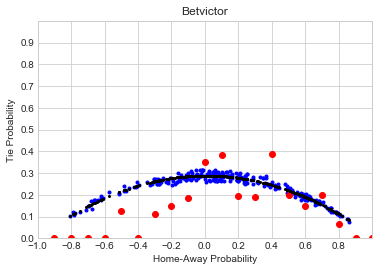

In [42]:

EPL_Betvictor_bets_HomeWin = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_1"]
EPL_Betvictor_bets_AwayWin = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_2"]
EPL_Betvictor_bets_Tie = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_x"]


EPL_Betvictor_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Betvictor_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Betvictor_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Betvictor_bets_HomeWin["Home Value"] = 1/EPL_Betvictor_bets_HomeWin["Home Value"]
EPL_Betvictor_bets_AwayWin["Away Value"] = 1/EPL_Betvictor_bets_AwayWin["Away Value"]
EPL_Betvictor_bets_Tie["Tie Value"] = 1/EPL_Betvictor_bets_Tie["Tie Value"]


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_HomeWin.merge(
        EPL_Betvictor_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds.merge(
        EPL_Betvictor_bets_Tie, on = 'match_id', how = 'left')


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better4 = EPL_Betvictor_bets_odds

better4_normHome = better4['Home Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

better4_normAway = better4['Away Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

better4_normTie = better4['Tie Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

Home_Away = better4_normHome - better4_normAway

better4.insert(7, 'Normalized Home', better4_normHome, True )
better4.insert(8, 'Normalized Away', better4_normAway, True )
better4.insert(9, 'Normalized Tie', better4_normTie, True )
better4.insert(10, 'Home - Away', Home_Away, True )

h1 = better4[(better4["Home - Away"] >= -1) & (better4["Home - Away"] < -0.9)].count()['Result_x']
h2 = better4[(better4["Home - Away"] >= -0.9) & (better4["Home - Away"] < -0.8)].count()['Result_x']
h3 = better4[(better4["Home - Away"] >= -0.8) & (better4["Home - Away"] < -0.7)].count()['Result_x']
h4 = better4[(better4["Home - Away"] >= -0.7) & (better4["Home - Away"] < -0.6)].count()['Result_x']
h5 = better4[(better4["Home - Away"] >= -0.6) & (better4["Home - Away"] < -0.5)].count()['Result_x']
h6 = better4[(better4["Home - Away"] >= -0.5) & (better4["Home - Away"] < -0.4)].count()['Result_x']
h7 = better4[(better4["Home - Away"] >= -0.4) & (better4["Home - Away"] < -0.3)].count()['Result_x']
h8 = better4[(better4["Home - Away"] >= -0.3) & (better4["Home - Away"] < -0.2)].count()['Result_x']
h9 = better4[(better4["Home - Away"] >= -0.2) & (better4["Home - Away"] < -0.1)].count()['Result_x']
h10 = better4[(better4["Home - Away"] >= -0.1) & (better4["Home - Away"] < 0)].count()['Result_x']
h11 = better4[(better4["Home - Away"] >= 0) & (better4["Home - Away"] < 0.1)].count()['Result_x']
h12 = better4[(better4["Home - Away"] >= 0.1) & (better4["Home - Away"] < 0.2)].count()['Result_x']
h13 = better4[(better4["Home - Away"] >= 0.2) & (better4["Home - Away"] < 0.3)].count()['Result_x']
h14 = better4[(better4["Home - Away"] >= 0.3) & (better4["Home - Away"] < 0.4)].count()['Result_x']
h15 = better4[(better4["Home - Away"] >= 0.4) & (better4["Home - Away"] < 0.5)].count()['Result_x']
h16 = better4[(better4["Home - Away"] >= 0.5) & (better4["Home - Away"] < 0.6)].count()['Result_x']
h17 = better4[(better4["Home - Away"] >= 0.6) & (better4["Home - Away"] < 0.7)].count()['Result_x']
h18 = better4[(better4["Home - Away"] >= 0.7) & (better4["Home - Away"] < 0.8)].count()['Result_x']
h19 = better4[(better4["Home - Away"] >= 0.8) & (better4["Home - Away"] < 0.9)].count()['Result_x']
h20 = better4[(better4["Home - Away"] >= 0.9) & (better4["Home - Away"] < 1)].count()['Result_x']

g1 = better4[(better4["Home - Away"] >= -1) & (better4["Home - Away"] < -0.9) & (better4["Result_x"]==0)].count()['Result_x']
g2 = better4[(better4["Home - Away"] >= -0.9) & (better4["Home - Away"] < -0.8)& (better4["Result_x"]==0)].count()['Result_x']
g3 = better4[(better4["Home - Away"] >= -0.8) & (better4["Home - Away"] < -0.7)& (better4["Result_x"]==0)].count()['Result_x']
g4 = better4[(better4["Home - Away"] >= -0.7) & (better4["Home - Away"] < -0.6)& (better4["Result_x"]==0)].count()['Result_x']
g5 = better4[(better4["Home - Away"] >= -0.6) & (better4["Home - Away"] < -0.5)& (better4["Result_x"]==0)].count()['Result_x']
g6 = better4[(better4["Home - Away"] >= -0.5) & (better4["Home - Away"] < -0.4)& (better4["Result_x"]==0)].count()['Result_x']
g7 = better4[(better4["Home - Away"] >= -0.4) & (better4["Home - Away"] < -0.3)& (better4["Result_x"]==0)].count()['Result_x']
g8 = better4[(better4["Home - Away"] >= -0.3) & (better4["Home - Away"] < -0.2)& (better4["Result_x"]==0)].count()['Result_x']
g9 = better4[(better4["Home - Away"] >= -0.2) & (better4["Home - Away"] < -0.1)& (better4["Result_x"]==0)].count()['Result_x']
g10 = better4[(better4["Home - Away"] >= -0.1) & (better4["Home - Away"] < 0)& (better4["Result_x"]==0)].count()['Result_x']
g11 = better4[(better4["Home - Away"] >= 0) & (better4["Home - Away"] < 0.1)& (better4["Result_x"]==0)].count()['Result_x']
g12 = better4[(better4["Home - Away"] >= 0.1) & (better4["Home - Away"] < 0.2)& (better4["Result_x"]==0)].count()['Result_x']
g13 = better4[(better4["Home - Away"] >= 0.2) & (better4["Home - Away"] < 0.3)& (better4["Result_x"]==0)].count()['Result_x']
g14 = better4[(better4["Home - Away"] >= 0.3) & (better4["Home - Away"] < 0.4)& (better4["Result_x"]==0)].count()['Result_x']
g15 = better4[(better4["Home - Away"] >= 0.4) & (better4["Home - Away"] < 0.5)& (better4["Result_x"]==0)].count()['Result_x']
g16 = better4[(better4["Home - Away"] >= 0.5) & (better4["Home - Away"] < 0.6)& (better4["Result_x"]==0)].count()['Result_x']
g17 = better4[(better4["Home - Away"] >= 0.6) & (better4["Home - Away"] < 0.7)& (better4["Result_x"]==0)].count()['Result_x']
g18 = better4[(better4["Home - Away"] >= 0.7) & (better4["Home - Away"] < 0.8)& (better4["Result_x"]==0)].count()['Result_x']
g19 = better4[(better4["Home - Away"] >= 0.8) & (better4["Home - Away"] < 0.9)& (better4["Result_x"]==0)].count()['Result_x']
g20 = better4[(better4["Home - Away"] >= 0.9) & (better4["Home - Away"] < 1)& (better4["Result_x"]==0)].count()['Result_x']


t1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10,
                        h11, h12, h13, h14, h15, h16, h17, h18,
                        h19,h20], 'Number of Draws:': [d1, g2, g3,
                        g4, g5, g6, g7, g8, g9, g10, g11, g12, g13,
                        g14, g15, g16, g17, g18, g19, g20]}

better4_draws = pd.DataFrame(data=t1)
better4_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better4_draws.fillna(0, inplace = True)



z = np.polyfit(better4['Home - Away'], better4['Normalized Tie'], 2)
p = np.poly1d(z)
plt.style.use('seaborn-whitegrid')
plt.title('Betvictor')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better4['Home - Away'],  better4['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better4_draws['Probability'],  better4_draws['Draw Probability'], 'o', color='red');
plt.plot(better4['Home - Away'],p(better4['Home - Away']),"o", ms=2,  color = 'black', )








Identical results

#  <font  color='red'>___Task 3___</font>

Basically, we will re-execute task 2 in this task, with only one difference: by excluding extraordinary events during a match. In order to do this, we must examine the "booking" and "stats" csv files. In order to do this, we will first examine the unique values in both csv files.

In [43]:
booking.card.unique()

array(['yellow card', 'red card'], dtype=object)

We see that there exists red and yellow cards in a match. We may want to learn the minutes red card events occurred.

In [45]:
booking[booking['card']=='red card']

,match_id,time,home_fault,card,away_fault
26,140207,66,NaN,red card,Grandsir S.
88,142512,90+6,Durak A.,red card,NaN
112,142709,64,Ozfesli A.,red card,NaN
149,143409,38,NaN,red card,Noble M.
153,143410,34,Traore I.,red card,NaN
268,144682,74,Romero C.,red card,NaN
305,145634,71,Slimani I.,red card,NaN
321,145636,90+5,NaN,red card,Ozturk E.
342,145786,10,NaN,red card,Ovacikli O.
347,145786,61,NaN,red card,Saadane M.


There are 395 matches in the dataset. A red card often results in a penalty, which may lead to goal. Nevertheless, effects of the red cards don't have the same effect on a match. For instance, in the match 2711144, two red cards occurd past 90+11 and its nearly the end of the match. Therefore, we remove the matches where there is a red card in first 75 minutes. Additionally, yellow cards have effect on the result of the match too; although its not as high as red card's effect. Therefore, we will remove the matches where there is a yellow card in first 45 minutes. 

However, there is a slight modification required in the dataset. As 'time' column features are written as str type, it is impossible to deploy mathematical operations. Converting str to int is not applicable in the basic for because some matches are written as "90+X", "89+x" and "45+x". In order to overcome this obstacle, I have rounded the extended times and then converted the column values into the int type.

In [46]:
booking[(booking['time'].apply(len) >2) & (booking['time'].str.get(0)=='4')] = '45'
booking[(booking['time'].apply(len) >2) & (booking['time'].str.get(0)=='9')] = '90'
booking[(booking['time'].apply(len) >2) & (booking['time'].str.get(0)=='8')] = '90'
booking['time'] = booking['time'].astype(int)

Then, we simply apply conditional elimination. We reach a new dataset, namely "sub3".

In [47]:
sub1 = booking[ (booking['time'] <= 45) & (booking['card'] == "yellow card") ]
sub2 = booking[ (booking['time'] <= 75) & (booking['card'] == "red card") ]
sub3 = sub1.append(sub2)

sub3 = sub3.drop_duplicates()

In [50]:
sub3 = sub3.reset_index(drop=True)


We have eliminated 3155 matches from all of the matches. Now, we will drop these matches from our matches.

In [51]:
for i in range(0, len(sub3)):
               deleted = sub3.iloc[i,0]
               EPL_Bets = EPL_Bets.drop(EPL_Bets[EPL_Bets['match_id'] == deleted].index)


From now here, rest is the same. We apply the same methodology on better basis.

##  <font  color='red'>___Interwetten - 3___</font>


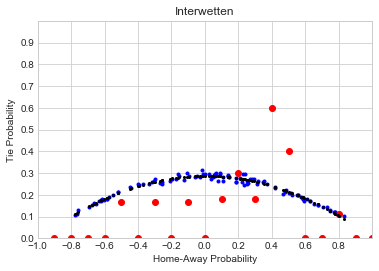

In [54]:
EPL_Interwetten_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Interwetten.es"]
EPL_Jetbull_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Jetbull"]
EPL_Betsafe_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "Betsafe"]
EPL_Betvictor_bets = EPL_Bets[EPL_Bets.odd_bookmakers == "BetVictor"]

EPL_Interwetten_bets = EPL_Interwetten_bets.reset_index(drop=True)
EPL_Jetbull_bets = EPL_Jetbull_bets.reset_index(drop=True)
EPL_Betsafe_bets = EPL_Betsafe_bets.reset_index(drop=True)
EPL_Betvictor_bets = EPL_Betvictor_bets.reset_index(drop=True)


EPL_Interwetten_bets_HomeWin = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_1"]
EPL_Interwetten_bets_AwayWin = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_2"]
EPL_Interwetten_bets_Tie = EPL_Interwetten_bets[EPL_Interwetten_bets.variable == "odd_x"]
EPL_Interwetten_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Interwetten_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Interwetten_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 


EPL_Interwetten_bets_HomeWin["Home Value"] = 1/EPL_Interwetten_bets_HomeWin["Home Value"]
EPL_Interwetten_bets_AwayWin["Away Value"] = 1/EPL_Interwetten_bets_AwayWin["Away Value"]
EPL_Interwetten_bets_Tie["Tie Value"] = 1/EPL_Interwetten_bets_Tie["Tie Value"]


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_HomeWin.merge(
        EPL_Interwetten_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds.merge(
        EPL_Interwetten_bets_Tie, on = 'match_id', how = 'left')


EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Interwetten_bets_odds = EPL_Interwetten_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]

better1 = EPL_Interwetten_bets_odds

better1_normHome = better1['Home Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

better1_normAway = better1['Away Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

better1_normTie = better1['Tie Value']* 1/(better1['Home Value']+better1['Away Value']+
                          better1['Tie Value'])

Home_Away = better1_normHome - better1_normAway

better1.insert(7, 'Normalized Home', better1_normHome, True )
better1.insert(8, 'Normalized Away', better1_normAway, True )
better1.insert(9, 'Normalized Tie', better1_normTie, True )
better1.insert(10, 'Home - Away', Home_Away, True )

a1 = better1[(better1["Home - Away"] >= -1) & (better1["Home - Away"] < -0.9)].count()['Result_x']
a2 = better1[(better1["Home - Away"] >= -0.9) & (better1["Home - Away"] < -0.8)].count()['Result_x']
a3 = better1[(better1["Home - Away"] >= -0.8) & (better1["Home - Away"] < -0.7)].count()['Result_x']
a4 = better1[(better1["Home - Away"] >= -0.7) & (better1["Home - Away"] < -0.6)].count()['Result_x']
a5 = better1[(better1["Home - Away"] >= -0.6) & (better1["Home - Away"] < -0.5)].count()['Result_x']
a6 = better1[(better1["Home - Away"] >= -0.5) & (better1["Home - Away"] < -0.4)].count()['Result_x']
a7 = better1[(better1["Home - Away"] >= -0.4) & (better1["Home - Away"] < -0.3)].count()['Result_x']
a8 = better1[(better1["Home - Away"] >= -0.3) & (better1["Home - Away"] < -0.2)].count()['Result_x']
a9 = better1[(better1["Home - Away"] >= -0.2) & (better1["Home - Away"] < -0.1)].count()['Result_x']
a10 = better1[(better1["Home - Away"] >= -0.1) & (better1["Home - Away"] < 0)].count()['Result_x']
a11 = better1[(better1["Home - Away"] >= 0) & (better1["Home - Away"] < 0.1)].count()['Result_x']
a12 = better1[(better1["Home - Away"] >= 0.1) & (better1["Home - Away"] < 0.2)].count()['Result_x']
a13 = better1[(better1["Home - Away"] >= 0.2) & (better1["Home - Away"] < 0.3)].count()['Result_x']
a14 = better1[(better1["Home - Away"] >= 0.3) & (better1["Home - Away"] < 0.4)].count()['Result_x']
a15 = better1[(better1["Home - Away"] >= 0.4) & (better1["Home - Away"] < 0.5)].count()['Result_x']
a16 = better1[(better1["Home - Away"] >= 0.5) & (better1["Home - Away"] < 0.6)].count()['Result_x']
a17 = better1[(better1["Home - Away"] >= 0.6) & (better1["Home - Away"] < 0.7)].count()['Result_x']
a18 = better1[(better1["Home - Away"] >= 0.7) & (better1["Home - Away"] < 0.8)].count()['Result_x']
a19 = better1[(better1["Home - Away"] >= 0.8) & (better1["Home - Away"] < 0.9)].count()['Result_x']
a20 = better1[(better1["Home - Away"] >= 0.9) & (better1["Home - Away"] < 1)].count()['Result_x']

b1 = better1[(better1["Home - Away"] >= -1) & (better1["Home - Away"] < -0.9) & (better1["Result_x"]==0)].count()['Result_x']
b2 = better1[(better1["Home - Away"] >= -0.9) & (better1["Home - Away"] < -0.8)& (better1["Result_x"]==0)].count()['Result_x']
b3 = better1[(better1["Home - Away"] >= -0.8) & (better1["Home - Away"] < -0.7)& (better1["Result_x"]==0)].count()['Result_x']
b4 = better1[(better1["Home - Away"] >= -0.7) & (better1["Home - Away"] < -0.6)& (better1["Result_x"]==0)].count()['Result_x']
b5 = better1[(better1["Home - Away"] >= -0.6) & (better1["Home - Away"] < -0.5)& (better1["Result_x"]==0)].count()['Result_x']
b6 = better1[(better1["Home - Away"] >= -0.5) & (better1["Home - Away"] < -0.4)& (better1["Result_x"]==0)].count()['Result_x']
b7 = better1[(better1["Home - Away"] >= -0.4) & (better1["Home - Away"] < -0.3)& (better1["Result_x"]==0)].count()['Result_x']
b8 = better1[(better1["Home - Away"] >= -0.3) & (better1["Home - Away"] < -0.2)& (better1["Result_x"]==0)].count()['Result_x']
b9 = better1[(better1["Home - Away"] >= -0.2) & (better1["Home - Away"] < -0.1)& (better1["Result_x"]==0)].count()['Result_x']
b10 = better1[(better1["Home - Away"] >= -0.1) & (better1["Home - Away"] < 0)& (better1["Result_x"]==0)].count()['Result_x']
b11 = better1[(better1["Home - Away"] >= 0) & (better1["Home - Away"] < 0.1)& (better1["Result_x"]==0)].count()['Result_x']
b12 = better1[(better1["Home - Away"] >= 0.1) & (better1["Home - Away"] < 0.2)& (better1["Result_x"]==0)].count()['Result_x']
b13 = better1[(better1["Home - Away"] >= 0.2) & (better1["Home - Away"] < 0.3)& (better1["Result_x"]==0)].count()['Result_x']
b14 = better1[(better1["Home - Away"] >= 0.3) & (better1["Home - Away"] < 0.4)& (better1["Result_x"]==0)].count()['Result_x']
b15 = better1[(better1["Home - Away"] >= 0.4) & (better1["Home - Away"] < 0.5)& (better1["Result_x"]==0)].count()['Result_x']
b16 = better1[(better1["Home - Away"] >= 0.5) & (better1["Home - Away"] < 0.6)& (better1["Result_x"]==0)].count()['Result_x']
b17 = better1[(better1["Home - Away"] >= 0.6) & (better1["Home - Away"] < 0.7)& (better1["Result_x"]==0)].count()['Result_x']
b18 = better1[(better1["Home - Away"] >= 0.7) & (better1["Home - Away"] < 0.8)& (better1["Result_x"]==0)].count()['Result_x']
b19 = better1[(better1["Home - Away"] >= 0.8) & (better1["Home - Away"] < 0.9)& (better1["Result_x"]==0)].count()['Result_x']
b20 = better1[(better1["Home - Away"] >= 0.9) & (better1["Home - Away"] < 1)& (better1["Result_x"]==0)].count()['Result_x']


x1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,
                        a11, a12, a13, a14, a15, a16, a17, a18,
                        a19,a20], 'Number of Draws:': [b1, b2, b3,
                        b4, b5, b6, b7, b8, b9, b10, b11, b12, b13,
                        b14, b15, b16, b17, b18, b19, b20]}

better1_draws = pd.DataFrame(data=x1)
better1_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better1_draws.fillna(0, inplace = True)

z = np.polyfit(better1['Home - Away'], better1['Normalized Tie'], 2)
p = np.poly1d(z)

plt.style.use('seaborn-whitegrid')
plt.title('Interwetten')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better1['Home - Away'],  better1['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better1_draws['Probability'],  better1_draws['Draw Probability'], 'o', color='red');
plt.plot(better1['Home - Away'],p(better1['Home - Away']),"o", ms=2,  color = 'black', )

Results indicate that there is a drammatical change in the odds bias. By excluding the matches where there is a red card before 75 minutes and yellow card before 45 minutes, it becomes possible for players to earn in long run by a greater chance, especially in the bins of 0.2 - 0.3, 0.4 - 0.5, 0.5 - 0.6 and 0.8 - 0.9.

##  <font  color='red'>___Jetbull - 3___</font>


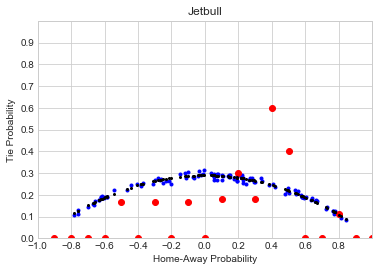

In [55]:
EPL_Jetbull_bets_HomeWin = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_1"]
EPL_Jetbull_bets_AwayWin = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_2"]
EPL_Jetbull_bets_Tie = EPL_Jetbull_bets[EPL_Jetbull_bets.variable == "odd_x"]


EPL_Jetbull_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Jetbull_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Jetbull_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Jetbull_bets_HomeWin["Home Value"] = 1/EPL_Jetbull_bets_HomeWin["Home Value"]
EPL_Jetbull_bets_AwayWin["Away Value"] = 1/EPL_Jetbull_bets_AwayWin["Away Value"]
EPL_Jetbull_bets_Tie["Tie Value"] = 1/EPL_Jetbull_bets_Tie["Tie Value"]


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_HomeWin.merge(
        EPL_Jetbull_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds.merge(
        EPL_Jetbull_bets_Tie, on = 'match_id', how = 'left')


EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Jetbull_bets_odds = EPL_Jetbull_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better2 = EPL_Jetbull_bets_odds

better2_normHome = better2['Home Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

better2_normAway = better2['Away Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

better2_normTie = better2['Tie Value']* 1/(better2['Home Value']+better2['Away Value']+
                          better2['Tie Value'])

Home_Away = better2_normHome - better2_normAway

better2.insert(7, 'Normalized Home', better2_normHome, True )
better2.insert(8, 'Normalized Away', better2_normAway, True )
better2.insert(9, 'Normalized Tie', better2_normTie, True )
better2.insert(10, 'Home - Away', Home_Away, True )

c1 = better2[(better2["Home - Away"] >= -1) & (better2["Home - Away"] < -0.9)].count()['Result_x']
c2 = better2[(better2["Home - Away"] >= -0.9) & (better2["Home - Away"] < -0.8)].count()['Result_x']
c3 = better2[(better2["Home - Away"] >= -0.8) & (better2["Home - Away"] < -0.7)].count()['Result_x']
c4 = better2[(better2["Home - Away"] >= -0.7) & (better2["Home - Away"] < -0.6)].count()['Result_x']
c5 = better2[(better2["Home - Away"] >= -0.6) & (better2["Home - Away"] < -0.5)].count()['Result_x']
c6 = better2[(better2["Home - Away"] >= -0.5) & (better2["Home - Away"] < -0.4)].count()['Result_x']
c7 = better2[(better2["Home - Away"] >= -0.4) & (better2["Home - Away"] < -0.3)].count()['Result_x']
c8 = better2[(better2["Home - Away"] >= -0.3) & (better2["Home - Away"] < -0.2)].count()['Result_x']
c9 = better2[(better2["Home - Away"] >= -0.2) & (better2["Home - Away"] < -0.1)].count()['Result_x']
c10 = better2[(better2["Home - Away"] >= -0.1) & (better2["Home - Away"] < 0)].count()['Result_x']
c11 = better2[(better2["Home - Away"] >= 0) & (better2["Home - Away"] < 0.1)].count()['Result_x']
c12 = better2[(better2["Home - Away"] >= 0.1) & (better2["Home - Away"] < 0.2)].count()['Result_x']
c13 = better2[(better2["Home - Away"] >= 0.2) & (better2["Home - Away"] < 0.3)].count()['Result_x']
c14 = better2[(better2["Home - Away"] >= 0.3) & (better2["Home - Away"] < 0.4)].count()['Result_x']
c15 = better2[(better2["Home - Away"] >= 0.4) & (better2["Home - Away"] < 0.5)].count()['Result_x']
c16 = better2[(better2["Home - Away"] >= 0.5) & (better2["Home - Away"] < 0.6)].count()['Result_x']
c17 = better2[(better2["Home - Away"] >= 0.6) & (better2["Home - Away"] < 0.7)].count()['Result_x']
c18 = better2[(better2["Home - Away"] >= 0.7) & (better2["Home - Away"] < 0.8)].count()['Result_x']
c19 = better2[(better2["Home - Away"] >= 0.8) & (better2["Home - Away"] < 0.9)].count()['Result_x']
c20 = better2[(better2["Home - Away"] >= 0.9) & (better2["Home - Away"] < 1)].count()['Result_x']

d1 = better2[(better2["Home - Away"] >= -1) & (better2["Home - Away"] < -0.9) & (better2["Result_x"]==0)].count()['Result_x']
d2 = better2[(better2["Home - Away"] >= -0.9) & (better2["Home - Away"] < -0.8)& (better2["Result_x"]==0)].count()['Result_x']
d3 = better2[(better2["Home - Away"] >= -0.8) & (better2["Home - Away"] < -0.7)& (better2["Result_x"]==0)].count()['Result_x']
d4 = better2[(better2["Home - Away"] >= -0.7) & (better2["Home - Away"] < -0.6)& (better2["Result_x"]==0)].count()['Result_x']
d5 = better2[(better2["Home - Away"] >= -0.6) & (better2["Home - Away"] < -0.5)& (better2["Result_x"]==0)].count()['Result_x']
d6 = better2[(better2["Home - Away"] >= -0.5) & (better2["Home - Away"] < -0.4)& (better2["Result_x"]==0)].count()['Result_x']
d7 = better2[(better2["Home - Away"] >= -0.4) & (better2["Home - Away"] < -0.3)& (better2["Result_x"]==0)].count()['Result_x']
d8 = better2[(better2["Home - Away"] >= -0.3) & (better2["Home - Away"] < -0.2)& (better2["Result_x"]==0)].count()['Result_x']
d9 = better2[(better2["Home - Away"] >= -0.2) & (better2["Home - Away"] < -0.1)& (better2["Result_x"]==0)].count()['Result_x']
d10 = better2[(better2["Home - Away"] >= -0.1) & (better2["Home - Away"] < 0)& (better2["Result_x"]==0)].count()['Result_x']
d11 = better2[(better2["Home - Away"] >= 0) & (better2["Home - Away"] < 0.1)& (better2["Result_x"]==0)].count()['Result_x']
d12 = better2[(better2["Home - Away"] >= 0.1) & (better2["Home - Away"] < 0.2)& (better2["Result_x"]==0)].count()['Result_x']
d13 = better2[(better2["Home - Away"] >= 0.2) & (better2["Home - Away"] < 0.3)& (better2["Result_x"]==0)].count()['Result_x']
d14 = better2[(better2["Home - Away"] >= 0.3) & (better2["Home - Away"] < 0.4)& (better2["Result_x"]==0)].count()['Result_x']
d15 = better2[(better2["Home - Away"] >= 0.4) & (better2["Home - Away"] < 0.5)& (better2["Result_x"]==0)].count()['Result_x']
d16 = better2[(better2["Home - Away"] >= 0.5) & (better2["Home - Away"] < 0.6)& (better2["Result_x"]==0)].count()['Result_x']
d17 = better2[(better2["Home - Away"] >= 0.6) & (better2["Home - Away"] < 0.7)& (better2["Result_x"]==0)].count()['Result_x']
d18 = better2[(better2["Home - Away"] >= 0.7) & (better2["Home - Away"] < 0.8)& (better2["Result_x"]==0)].count()['Result_x']
d19 = better2[(better2["Home - Away"] >= 0.8) & (better2["Home - Away"] < 0.9)& (better2["Result_x"]==0)].count()['Result_x']
d20 = better2[(better2["Home - Away"] >= 0.9) & (better2["Home - Away"] < 1)& (better2["Result_x"]==0)].count()['Result_x']


y1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
                        c11, c12, c13, c14, c15, c16, c17, c18,
                        c19,c20], 'Number of Draws:': [d1, d2, d3,
                        d4, d5, d6, d7, d8, d9, d10, d11, d12, d13,
                        d14, d15, d16, d17, d18, d19, d20]}

better2_draws = pd.DataFrame(data=y1)
better2_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better2_draws.fillna(0, inplace = True)



z = np.polyfit(better2['Home - Away'], better2['Normalized Tie'], 2)
p = np.poly1d(z)
plt.style.use('seaborn-whitegrid')
plt.title('Jetbull')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better2['Home - Away'],  better2['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better2_draws['Probability'],  better2_draws['Draw Probability'], 'o', color='red');
plt.plot(better2['Home - Away'],p(better2['Home - Away']),"o", ms=2,  color = 'black', )


Results of Jetbull are nearly identical with Interwetten, thus same comments appply.

##  <font  color='red'>___Betsafe - 3___</font>


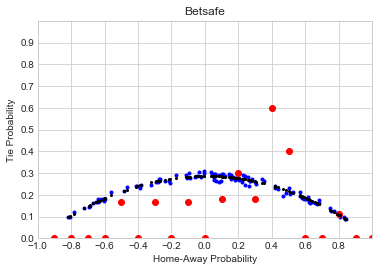

In [56]:

EPL_Betsafe_bets_HomeWin = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_1"]
EPL_Betsafe_bets_AwayWin = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_2"]
EPL_Betsafe_bets_Tie = EPL_Betsafe_bets[EPL_Betsafe_bets.variable == "odd_x"]


EPL_Betsafe_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Betsafe_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Betsafe_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Betsafe_bets_HomeWin["Home Value"] = 1/EPL_Betsafe_bets_HomeWin["Home Value"]
EPL_Betsafe_bets_AwayWin["Away Value"] = 1/EPL_Betsafe_bets_AwayWin["Away Value"]
EPL_Betsafe_bets_Tie["Tie Value"] = 1/EPL_Betsafe_bets_Tie["Tie Value"]


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_HomeWin.merge(
        EPL_Betsafe_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds.merge(
        EPL_Betsafe_bets_Tie, on = 'match_id', how = 'left')


EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Betsafe_bets_odds = EPL_Betsafe_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better3 = EPL_Betsafe_bets_odds

better3_normHome = better3['Home Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

better3_normAway = better3['Away Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

better3_normTie = better3['Tie Value']* 1/(better3['Home Value']+better3['Away Value']+
                          better3['Tie Value'])

Home_Away = better3_normHome - better3_normAway

better3.insert(7, 'Normalized Home', better3_normHome, True )
better3.insert(8, 'Normalized Away', better3_normAway, True )
better3.insert(9, 'Normalized Tie', better3_normTie, True )
better3.insert(10, 'Home - Away', Home_Away, True )

e1 = better3[(better3["Home - Away"] >= -1) & (better3["Home - Away"] < -0.9)].count()['Result_x']
e2 = better3[(better3["Home - Away"] >= -0.9) & (better3["Home - Away"] < -0.8)].count()['Result_x']
e3 = better3[(better3["Home - Away"] >= -0.8) & (better3["Home - Away"] < -0.7)].count()['Result_x']
e4 = better3[(better3["Home - Away"] >= -0.7) & (better3["Home - Away"] < -0.6)].count()['Result_x']
e5 = better3[(better3["Home - Away"] >= -0.6) & (better3["Home - Away"] < -0.5)].count()['Result_x']
e6 = better3[(better3["Home - Away"] >= -0.5) & (better3["Home - Away"] < -0.4)].count()['Result_x']
e7 = better3[(better3["Home - Away"] >= -0.4) & (better3["Home - Away"] < -0.3)].count()['Result_x']
e8 = better3[(better3["Home - Away"] >= -0.3) & (better3["Home - Away"] < -0.2)].count()['Result_x']
e9 = better3[(better3["Home - Away"] >= -0.2) & (better3["Home - Away"] < -0.1)].count()['Result_x']
e10 = better3[(better3["Home - Away"] >= -0.1) & (better3["Home - Away"] < 0)].count()['Result_x']
e11 = better3[(better3["Home - Away"] >= 0) & (better3["Home - Away"] < 0.1)].count()['Result_x']
e12 = better3[(better3["Home - Away"] >= 0.1) & (better3["Home - Away"] < 0.2)].count()['Result_x']
e13 = better3[(better3["Home - Away"] >= 0.2) & (better3["Home - Away"] < 0.3)].count()['Result_x']
e14 = better3[(better3["Home - Away"] >= 0.3) & (better3["Home - Away"] < 0.4)].count()['Result_x']
e15 = better3[(better3["Home - Away"] >= 0.4) & (better3["Home - Away"] < 0.5)].count()['Result_x']
e16 = better3[(better3["Home - Away"] >= 0.5) & (better3["Home - Away"] < 0.6)].count()['Result_x']
e17 = better3[(better3["Home - Away"] >= 0.6) & (better3["Home - Away"] < 0.7)].count()['Result_x']
e18 = better3[(better3["Home - Away"] >= 0.7) & (better3["Home - Away"] < 0.8)].count()['Result_x']
e19 = better3[(better3["Home - Away"] >= 0.8) & (better3["Home - Away"] < 0.9)].count()['Result_x']
e20 = better3[(better3["Home - Away"] >= 0.9) & (better3["Home - Away"] < 1)].count()['Result_x']

f1 = better3[(better3["Home - Away"] >= -1) & (better3["Home - Away"] < -0.9) & (better3["Result_x"]==0)].count()['Result_x']
f2 = better3[(better3["Home - Away"] >= -0.9) & (better3["Home - Away"] < -0.8)& (better3["Result_x"]==0)].count()['Result_x']
f3 = better3[(better3["Home - Away"] >= -0.8) & (better3["Home - Away"] < -0.7)& (better3["Result_x"]==0)].count()['Result_x']
f4 = better3[(better3["Home - Away"] >= -0.7) & (better3["Home - Away"] < -0.6)& (better3["Result_x"]==0)].count()['Result_x']
f5 = better3[(better3["Home - Away"] >= -0.6) & (better3["Home - Away"] < -0.5)& (better3["Result_x"]==0)].count()['Result_x']
f6 = better3[(better3["Home - Away"] >= -0.5) & (better3["Home - Away"] < -0.4)& (better3["Result_x"]==0)].count()['Result_x']
f7 = better3[(better3["Home - Away"] >= -0.4) & (better3["Home - Away"] < -0.3)& (better3["Result_x"]==0)].count()['Result_x']
f8 = better3[(better3["Home - Away"] >= -0.3) & (better3["Home - Away"] < -0.2)& (better3["Result_x"]==0)].count()['Result_x']
f9 = better3[(better3["Home - Away"] >= -0.2) & (better3["Home - Away"] < -0.1)& (better3["Result_x"]==0)].count()['Result_x']
f10 = better3[(better3["Home - Away"] >= -0.1) & (better3["Home - Away"] < 0)& (better3["Result_x"]==0)].count()['Result_x']
f11 = better3[(better3["Home - Away"] >= 0) & (better3["Home - Away"] < 0.1)& (better3["Result_x"]==0)].count()['Result_x']
f12 = better3[(better3["Home - Away"] >= 0.1) & (better3["Home - Away"] < 0.2)& (better3["Result_x"]==0)].count()['Result_x']
f13 = better3[(better3["Home - Away"] >= 0.2) & (better3["Home - Away"] < 0.3)& (better3["Result_x"]==0)].count()['Result_x']
f14 = better3[(better3["Home - Away"] >= 0.3) & (better3["Home - Away"] < 0.4)& (better3["Result_x"]==0)].count()['Result_x']
f15 = better3[(better3["Home - Away"] >= 0.4) & (better3["Home - Away"] < 0.5)& (better3["Result_x"]==0)].count()['Result_x']
f16 = better3[(better3["Home - Away"] >= 0.5) & (better3["Home - Away"] < 0.6)& (better3["Result_x"]==0)].count()['Result_x']
f17 = better3[(better3["Home - Away"] >= 0.6) & (better3["Home - Away"] < 0.7)& (better3["Result_x"]==0)].count()['Result_x']
f18 = better3[(better3["Home - Away"] >= 0.7) & (better3["Home - Away"] < 0.8)& (better3["Result_x"]==0)].count()['Result_x']
f19 = better3[(better3["Home - Away"] >= 0.8) & (better3["Home - Away"] < 0.9)& (better3["Result_x"]==0)].count()['Result_x']
f20 = better3[(better3["Home - Away"] >= 0.9) & (better3["Home - Away"] < 1)& (better3["Result_x"]==0)].count()['Result_x']


z1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [e1, e2, e3, e4, e5, e6, e7, e8, e9, e10,
                        e11, e12, e13, e14, e15, e16, e17, e18,
                        e19,e20], 'Number of Draws:': [f1, f2, f3,
                        f4, f5, f6, f7, f8, f9, f10, f11, f12, f13,
                        f14, f15, f16, f17, f18, f19, f20]}

better3_draws = pd.DataFrame(data=z1)
better3_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better3_draws.fillna(0, inplace = True)



z = np.polyfit(better3['Home - Away'], better3['Normalized Tie'], 2)
p = np.poly1d(z)
plt.title('Betsafe')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.style.use('seaborn-whitegrid')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better3['Home - Away'],  better3['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better3_draws['Probability'],  better3_draws['Draw Probability'], 'o', color='red');
plt.plot(better3['Home - Away'],p(better3['Home - Away']),"o", ms=2,  color = 'black', )








Again, we obtained identical results, which is not surprising considering the case.

##  <font  color='red'>___Betvictor - 3___</font>


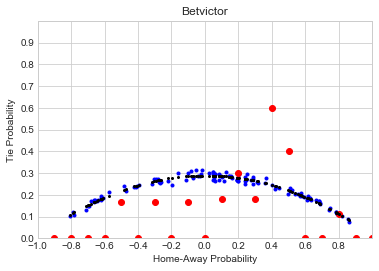

In [58]:

EPL_Betvictor_bets_HomeWin = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_1"]
EPL_Betvictor_bets_AwayWin = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_2"]
EPL_Betvictor_bets_Tie = EPL_Betvictor_bets[EPL_Betvictor_bets.variable == "odd_x"]


EPL_Betvictor_bets_HomeWin.rename(columns = {"value": "Home Value"},  inplace = True) 
EPL_Betvictor_bets_AwayWin.rename(columns = {"value": "Away Value"},  inplace = True) 
EPL_Betvictor_bets_Tie.rename(columns = {"value": "Tie Value"},  inplace = True) 

EPL_Betvictor_bets_HomeWin["Home Value"] = 1/EPL_Betvictor_bets_HomeWin["Home Value"]
EPL_Betvictor_bets_AwayWin["Away Value"] = 1/EPL_Betvictor_bets_AwayWin["Away Value"]
EPL_Betvictor_bets_Tie["Tie Value"] = 1/EPL_Betvictor_bets_Tie["Tie Value"]


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_HomeWin.merge(
        EPL_Betvictor_bets_AwayWin, on = 'match_id', how = 'left')


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds.merge(
        EPL_Betvictor_bets_Tie, on = 'match_id', how = 'left')


EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds.drop(
        ['variable_x', 'odd_bookmakers_y', 'variable_y', 'league_id_x', 'Result_y',
         'Result', 'league_id', 'variable', 'odd_bookmakers', ], axis = 1) 

EPL_Betvictor_bets_odds = EPL_Betvictor_bets_odds[['match_id','odd_bookmakers_x',
                                                       'league_id_y', 'Result_x',
                                                       'Home Value', 'Away Value',
                                                       'Tie Value']]


better4 = EPL_Betvictor_bets_odds

better4_normHome = better4['Home Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

better4_normAway = better4['Away Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

better4_normTie = better4['Tie Value']* 1/(better4['Home Value']+better4['Away Value']+
                          better4['Tie Value'])

Home_Away = better4_normHome - better4_normAway

better4.insert(7, 'Normalized Home', better4_normHome, True )
better4.insert(8, 'Normalized Away', better4_normAway, True )
better4.insert(9, 'Normalized Tie', better4_normTie, True )
better4.insert(10, 'Home - Away', Home_Away, True )

h1 = better4[(better4["Home - Away"] >= -1) & (better4["Home - Away"] < -0.9)].count()['Result_x']
h2 = better4[(better4["Home - Away"] >= -0.9) & (better4["Home - Away"] < -0.8)].count()['Result_x']
h3 = better4[(better4["Home - Away"] >= -0.8) & (better4["Home - Away"] < -0.7)].count()['Result_x']
h4 = better4[(better4["Home - Away"] >= -0.7) & (better4["Home - Away"] < -0.6)].count()['Result_x']
h5 = better4[(better4["Home - Away"] >= -0.6) & (better4["Home - Away"] < -0.5)].count()['Result_x']
h6 = better4[(better4["Home - Away"] >= -0.5) & (better4["Home - Away"] < -0.4)].count()['Result_x']
h7 = better4[(better4["Home - Away"] >= -0.4) & (better4["Home - Away"] < -0.3)].count()['Result_x']
h8 = better4[(better4["Home - Away"] >= -0.3) & (better4["Home - Away"] < -0.2)].count()['Result_x']
h9 = better4[(better4["Home - Away"] >= -0.2) & (better4["Home - Away"] < -0.1)].count()['Result_x']
h10 = better4[(better4["Home - Away"] >= -0.1) & (better4["Home - Away"] < 0)].count()['Result_x']
h11 = better4[(better4["Home - Away"] >= 0) & (better4["Home - Away"] < 0.1)].count()['Result_x']
h12 = better4[(better4["Home - Away"] >= 0.1) & (better4["Home - Away"] < 0.2)].count()['Result_x']
h13 = better4[(better4["Home - Away"] >= 0.2) & (better4["Home - Away"] < 0.3)].count()['Result_x']
h14 = better4[(better4["Home - Away"] >= 0.3) & (better4["Home - Away"] < 0.4)].count()['Result_x']
h15 = better4[(better4["Home - Away"] >= 0.4) & (better4["Home - Away"] < 0.5)].count()['Result_x']
h16 = better4[(better4["Home - Away"] >= 0.5) & (better4["Home - Away"] < 0.6)].count()['Result_x']
h17 = better4[(better4["Home - Away"] >= 0.6) & (better4["Home - Away"] < 0.7)].count()['Result_x']
h18 = better4[(better4["Home - Away"] >= 0.7) & (better4["Home - Away"] < 0.8)].count()['Result_x']
h19 = better4[(better4["Home - Away"] >= 0.8) & (better4["Home - Away"] < 0.9)].count()['Result_x']
h20 = better4[(better4["Home - Away"] >= 0.9) & (better4["Home - Away"] < 1)].count()['Result_x']

g1 = better4[(better4["Home - Away"] >= -1) & (better4["Home - Away"] < -0.9) & (better4["Result_x"]==0)].count()['Result_x']
g2 = better4[(better4["Home - Away"] >= -0.9) & (better4["Home - Away"] < -0.8)& (better4["Result_x"]==0)].count()['Result_x']
g3 = better4[(better4["Home - Away"] >= -0.8) & (better4["Home - Away"] < -0.7)& (better4["Result_x"]==0)].count()['Result_x']
g4 = better4[(better4["Home - Away"] >= -0.7) & (better4["Home - Away"] < -0.6)& (better4["Result_x"]==0)].count()['Result_x']
g5 = better4[(better4["Home - Away"] >= -0.6) & (better4["Home - Away"] < -0.5)& (better4["Result_x"]==0)].count()['Result_x']
g6 = better4[(better4["Home - Away"] >= -0.5) & (better4["Home - Away"] < -0.4)& (better4["Result_x"]==0)].count()['Result_x']
g7 = better4[(better4["Home - Away"] >= -0.4) & (better4["Home - Away"] < -0.3)& (better4["Result_x"]==0)].count()['Result_x']
g8 = better4[(better4["Home - Away"] >= -0.3) & (better4["Home - Away"] < -0.2)& (better4["Result_x"]==0)].count()['Result_x']
g9 = better4[(better4["Home - Away"] >= -0.2) & (better4["Home - Away"] < -0.1)& (better4["Result_x"]==0)].count()['Result_x']
g10 = better4[(better4["Home - Away"] >= -0.1) & (better4["Home - Away"] < 0)& (better4["Result_x"]==0)].count()['Result_x']
g11 = better4[(better4["Home - Away"] >= 0) & (better4["Home - Away"] < 0.1)& (better4["Result_x"]==0)].count()['Result_x']
g12 = better4[(better4["Home - Away"] >= 0.1) & (better4["Home - Away"] < 0.2)& (better4["Result_x"]==0)].count()['Result_x']
g13 = better4[(better4["Home - Away"] >= 0.2) & (better4["Home - Away"] < 0.3)& (better4["Result_x"]==0)].count()['Result_x']
g14 = better4[(better4["Home - Away"] >= 0.3) & (better4["Home - Away"] < 0.4)& (better4["Result_x"]==0)].count()['Result_x']
g15 = better4[(better4["Home - Away"] >= 0.4) & (better4["Home - Away"] < 0.5)& (better4["Result_x"]==0)].count()['Result_x']
g16 = better4[(better4["Home - Away"] >= 0.5) & (better4["Home - Away"] < 0.6)& (better4["Result_x"]==0)].count()['Result_x']
g17 = better4[(better4["Home - Away"] >= 0.6) & (better4["Home - Away"] < 0.7)& (better4["Result_x"]==0)].count()['Result_x']
g18 = better4[(better4["Home - Away"] >= 0.7) & (better4["Home - Away"] < 0.8)& (better4["Result_x"]==0)].count()['Result_x']
g19 = better4[(better4["Home - Away"] >= 0.8) & (better4["Home - Away"] < 0.9)& (better4["Result_x"]==0)].count()['Result_x']
g20 = better4[(better4["Home - Away"] >= 0.9) & (better4["Home - Away"] < 1)& (better4["Result_x"]==0)].count()['Result_x']


t1 = {'Probability': [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                      -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,
                      0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] ,'Total Matches': [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10,
                        h11, h12, h13, h14, h15, h16, h17, h18,
                        h19,h20], 'Number of Draws:': [d1, g2, g3,
                        g4, g5, g6, g7, g8, g9, g10, g11, g12, g13,
                        g14, g15, g16, g17, g18, g19, g20]}

better4_draws = pd.DataFrame(data=t1)
better4_draws['Draw Probability'] = better1_draws['Number of Draws:']/better1_draws['Total Matches']
better4_draws.fillna(0, inplace = True)



z = np.polyfit(better4['Home - Away'], better4['Normalized Tie'], 2)
p = np.poly1d(z)
plt.style.use('seaborn-whitegrid')
plt.title('Betvictor')
plt.xlabel('Home-Away Probability')
plt.ylabel('Tie Probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step = 0.1))
plt.xticks(np.arange(-1, 1, 0.2))
plt.plot(better4['Home - Away'],  better4['Normalized Tie'],  'o', ms=3 , color='blue');
plt.plot(better4_draws['Probability'],  better4_draws['Draw Probability'], 'o', color='red');
plt.plot(better4['Home - Away'],p(better4['Home - Away']),"o", ms=2,  color = 'black', )








Same as the previous ones, results are identical.

##  <font  color='red'>___Task 3 - Conclusion___</font>


From the obtained results, it can be interpreted that especially in the matches where home team has a slight average over the away team, it is possible to win by betting on draw in a long term if there isn't any bookings in a match. Nevertheless, we see in the previously accomplished tasks that excluding matches based on some events, in our case red cards before 75 minute mark and yellow cards before 45 minute mark up drammatically affect the odds. Thus, we can also say that betmakers consider these events while setting the odds as they are not losing money in long run when someone bets on draws.